# Introduction to filtering the gnomAD variant data

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1">Import modules</a></span></li><li><span><a href="#Filter-to-variants-in-a-specific-gene" data-toc-modified-id="Filter-to-variants-in-a-specific-gene-2">Filter to variants in a specific gene</a></span><ul class="toc-item"><li><span><a href="#On-region-view-(the-interval-of-a-gene)" data-toc-modified-id="On-region-view-(the-interval-of-a-gene)-2.1">On region view (the interval of a gene)</a></span></li><li><span><a href="#On-gene-page" data-toc-modified-id="On-gene-page-2.2">On gene page</a></span></li></ul></li><li><span><a href="#Filter-to-variants-by-Ensembl-Variant-Effect-Predictor-(VEP)" data-toc-modified-id="Filter-to-variants-by-Ensembl-Variant-Effect-Predictor-(VEP)-3">Filter to variants by Ensembl Variant Effect Predictor (VEP)</a></span><ul class="toc-item"><li><span><a href="#Filter-to-lof,-missense,-and-synonymous-variants-passing-filters" data-toc-modified-id="Filter-to-lof,-missense,-and-synonymous-variants-passing-filters-3.1">Filter to <code>lof</code>, <code>missense</code>, and <code>synonymous</code> variants passing filters</a></span></li><li><span><a href="#Filter-to-lof-variants-passing-filters" data-toc-modified-id="Filter-to-lof-variants-passing-filters-3.2">Filter to <code>lof</code> variants passing filters</a></span></li><li><span><a href="#Filter-to-missense-variants-passing-filters" data-toc-modified-id="Filter-to-missense-variants-passing-filters-3.3">Filter to <code>missense</code> variants passing filters</a></span></li><li><span><a href="#Filter-to-synonymous-variants-passing-filters" data-toc-modified-id="Filter-to-synonymous-variants-passing-filters-3.4">Filter to <code>synonymous</code> variants passing filters</a></span></li><li><span><a href="#Filter-to-'Other'-variants-passing-filters" data-toc-modified-id="Filter-to-'Other'-variants-passing-filters-3.5">Filter to 'Other' variants passing filters</a></span></li></ul></li><li><span><a href="#Get-frequency-information-for-specific-genetic-ancestry-groups" data-toc-modified-id="Get-frequency-information-for-specific-genetic-ancestry-groups-4">Get frequency information for specific genetic ancestry groups</a></span><ul class="toc-item"><li><span><a href="#Single-genetic-ancestry-group" data-toc-modified-id="Single-genetic-ancestry-group-4.1">Single genetic ancestry group</a></span></li><li><span><a href="#Multiple-genetic-ancestry-groups" data-toc-modified-id="Multiple-genetic-ancestry-groups-4.2">Multiple genetic ancestry groups</a></span></li></ul></li><li><span><a href="#Get-frequency-information-for-a-specific-genetic-ancestry-group-at-a-specific-variant" data-toc-modified-id="Get-frequency-information-for-a-specific-genetic-ancestry-group-at-a-specific-variant-5">Get frequency information for a specific genetic ancestry group at a specific variant</a></span><ul class="toc-item"><li><span><a href="#Example-when-the-variant-exists" data-toc-modified-id="Example-when-the-variant-exists-5.1">Example when the variant exists</a></span></li><li><span><a href="#Example-when-the-variant-doesn't-exist" data-toc-modified-id="Example-when-the-variant-doesn't-exist-5.2">Example when the variant <em>doesn't</em> exist</a></span></li></ul></li></ul></div>

## Import modules

In [1]:
import hail as hl

from gnomad_toolbox.load_data import get_gnomad_release
from gnomad_toolbox.filtering.variant import filter_by_intervals, filter_by_gene_symbol
from gnomad_toolbox.filtering.frequency import (
    get_ancestry_callstats, 
    get_single_variant_ancestry_callstats,
)
from gnomad_toolbox.filtering.vep import filter_by_consequence_category

Loading BokehJS ...

In [2]:
hl.init(backend="local")

Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.132-678e1f52b999
LOGGING: writing to /Users/heqin/PycharmProjects/gnomad-toolbox/gnomad_toolbox/notebooks/hail-20250115-1742-0.2.132-678e1f52b999.log
2025-01-15 17:44:17.708 Hail: WARN: No variant found at chr22:15528692 with alleles ['C', 'A']


## Filter to variants in a specific gene

Here we show two ways that you can load a variant table on the gnomAD browser:
  - The [region view](https://gnomad.broadinstitute.org/region/11-113409605-113475691?dataset=gnomad_r4)
  - The [gene page](https://gnomad.broadinstitute.org/gene/ENSG00000149295?dataset=gnomad_r4)
    - Only includes variants located in or within 75 base pairs of a coding exon (CDS)

We use the *DRD2* gene as an example. 

### On region view (the interval of a gene)

<table style="margin-left:0; margin-right:auto;"><tr>
<td> 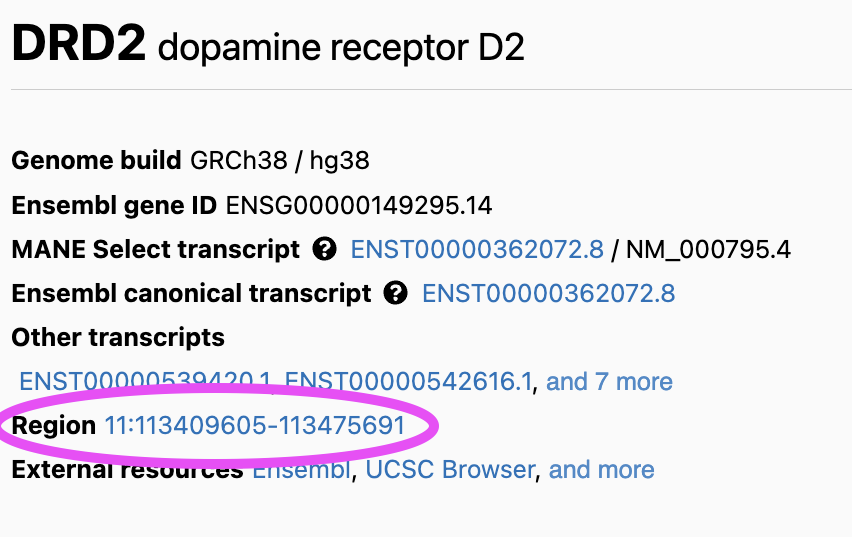 </td>
<td> </td>
</tr>
<tr>
<td> 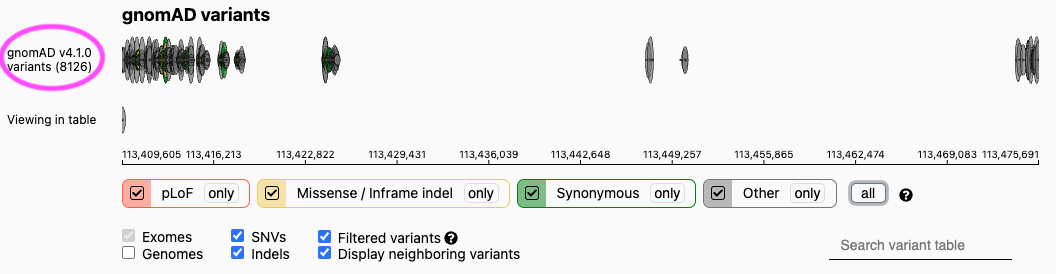 </td>
</tr>
</table>

In [3]:
drd2_interval = "chr11:113409605-113475691"
drd2_interval_ht = filter_by_intervals(drd2_interval)
print(f"The total number of variants in the DRD2 interval {drd2_interval} is: {drd2_interval_ht.count()}")

The total number of variants in the DRD2 interval chr11:113409605-113475691 is: 8126


### On gene page

To get the number of variants shown on the gene page, if you click 'all' and check 'exomes', 'SNVs', 'Indels', and 'Filtered variants' as this: 

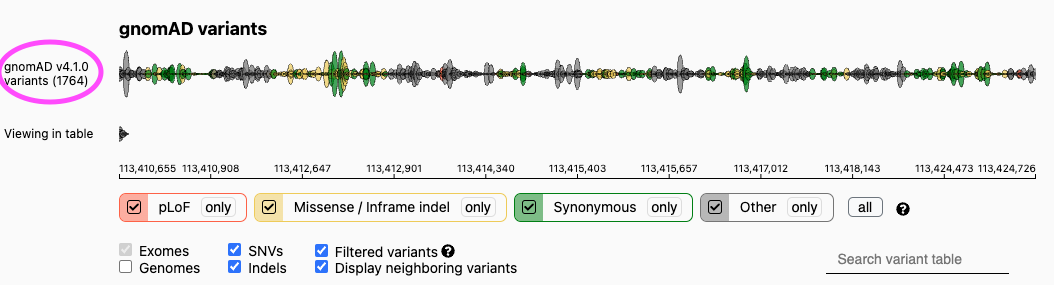

In [4]:
drd2_ht = filter_by_gene_symbol('drd2')
print("The total number of variants in DRD2 is: ", drd2_ht.count())

01/15/2025 05:43:04 PM (gnomad.utils.filtering 456): No Gencode Table or version was supplied, using Gencode version v39
01/15/2025 05:43:12 PM (gnomad.utils.filtering 531): Since 1 is less than or equal to 'max_collect_intervals', collecting all intervals...
01/15/2025 05:43:25 PM (gnomad.utils.filtering 531): Since 39 is less than or equal to 'max_collect_intervals', collecting all intervals...


The total number of variants in DRD2 is:  1764


## Filter to variants by Ensembl Variant Effect Predictor (VEP)

The examples below show the VEP based filtering using the Table filtered to DRD2.

### Filter to `lof`, `missense`, and `synonymous` variants passing filters

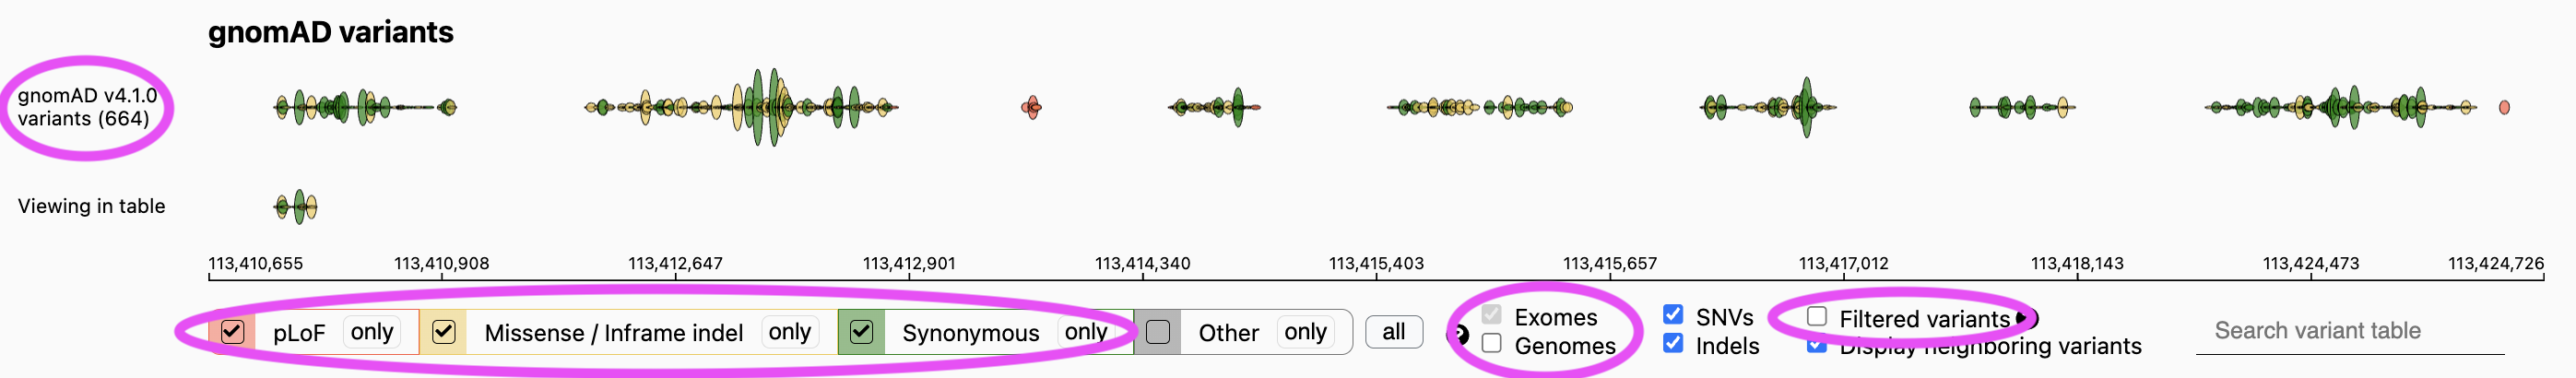

In [5]:
var_ht = filter_by_consequence_category(
    plof=True, 
    missense=True,
    synonymous=True, 
    ht=drd2_ht,
)
var_ht.show(5)
print("The total number of lof, missense, and synonymous variants passing filters in DRD2 is: ", var_ht.count())

+-----------------+------------+
| locus           | alleles    |
+-----------------+------------+
| locus<GRCh38>   | array<str> |
+-----------------+------------+
| chr11:113410731 | ["C","A"]  |
| chr11:113410731 | ["C","T"]  |
| chr11:113410735 | ["G","A"]  |
| chr11:113410736 | ["G","A"]  |
| chr11:113410736 | ["G","T"]  |
+-----------------+------------+

+------------------------------------------------------------------------------+
| freq                                                                         |
+------------------------------------------------------------------------------+
| array<struct{AC: int32, AF: float64, AN: int32, homozygote_count: int64}>    |
+------------------------------------------------------------------------------+
| [(2,1.37e-06,1461866,0),(2,1.37e-06,1461894,0),(0,0.00e+00,33480,0),(2,4.... |
| [(1,6.84e-07,1461866,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
| [(75,5.13e-05,1461876,0),(75,5.13e-05,1461894,0),(0,0.00e+00,33480,0),(0,... |
| [(15,1.03e-05,1461882,0),(15,1.03e-05,1461894,0),(0,0.00e+00,33480,0),(0,... |
| [(1,6.84e-07,1461882,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
+------------------------------------------------------------------------------+

+------------------+------------------+------------------+
| grpmax.gnomad.AC | grpmax.gnomad.AF | grpmax.gnomad.AN |
+------------------+------------------+------------------+
|            int32 |          float64 |            int32 |
+------------------+------------------+------------------+
|                2 |         4.47e-05 |            44724 |
|                1 |         8.99e-07 |          1112010 |
|                8 |         7.19e-06 |          1112004 |
|               15 |         1.35e-05 |          1112010 |
|                1 |         8.99e-07 |          1112010 |
+------------------+------------------+------------------+

+--------------------------------+-----------------------+-------------------+
| grpmax.gnomad.homozygote_count | grpmax.gnomad.gen_anc | grpmax.non_ukb.AC |
+--------------------------------+-----------------------+-------------------+
|                          int64 | str                   |             int32 |
+--------------------------------+-----------------------+-------------------+
|                              0 | "amr"                 |                 2 |
|                              0 | "nfe"                 |                NA |
|                              0 | "nfe"                 |                 2 |
|                              0 | "nfe"                 |                 1 |
|                              0 | "nfe"                 |                NA |
+--------------------------------+-----------------------+-------------------+

+-------------------+-------------------+---------------------------------+
| grpmax.non_ukb.AF | grpmax.non_ukb.AN | grpmax.non_ukb.homozygote_count |
+-------------------+-------------------+---------------------------------+
|           float64 |             int32 |                           int64 |
+-------------------+-------------------+---------------------------------+
|          4.57e-05 |             43740 |                               0 |
|                NA |                NA |                              NA |
|          5.71e-06 |            350102 |                               0 |
|          2.86e-06 |            350106 |                               0 |
|                NA |                NA |                              NA |
+-------------------+-------------------+---------------------------------+

+------------------------+
| grpmax.non_ukb.gen_anc |
+------------------------+
| str                    |
+------------------------+
| "amr"                  |
| NA                     |
| "nfe"                  |
| "nfe"                  |
| NA                     |
+------------------------+

+------------------------------------------------------------------------------+
| faf   

The total number of lof, missense, and synonymous variants passing filters in DRD2 is:  664


### Filter to `lof` variants passing filters

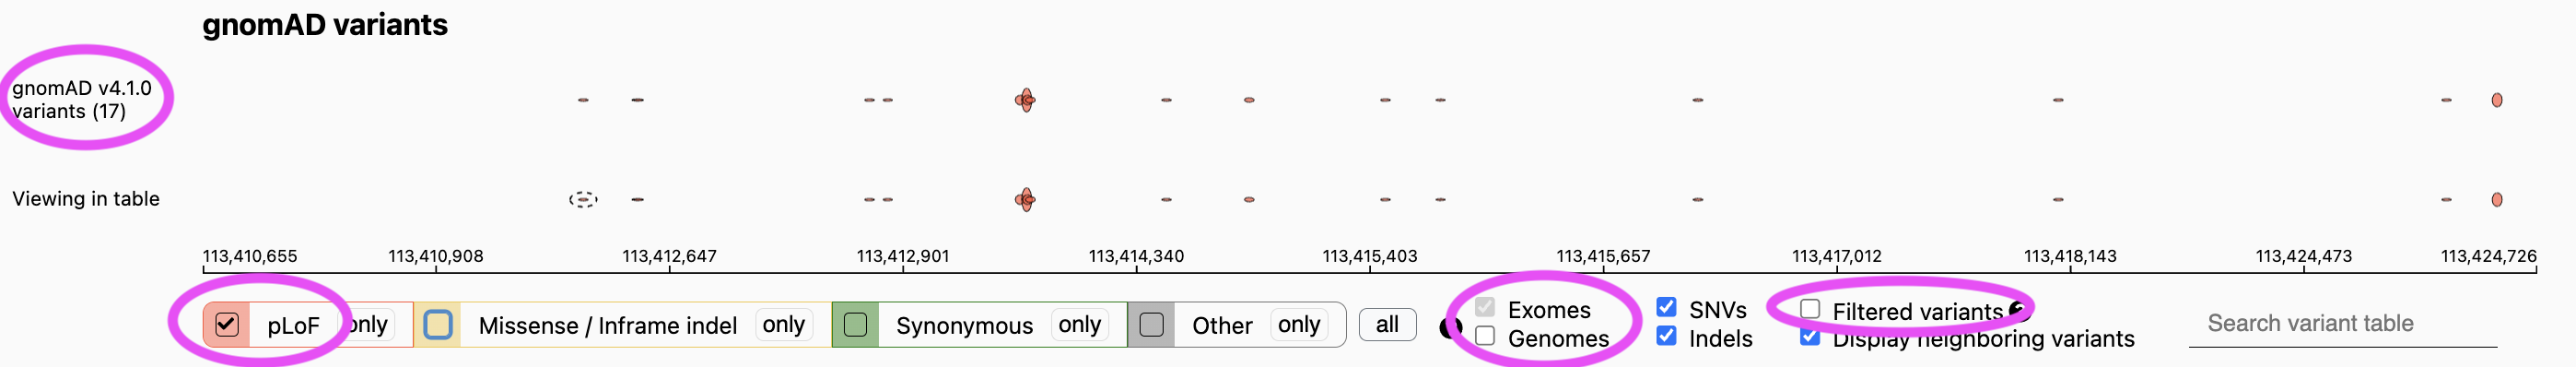

In [6]:
var_ht = filter_by_consequence_category(plof=True, ht=drd2_ht)
var_ht.show(5)
print("The total number of lof variants passing filters in DRD2 is: ", var_ht.count())

+-----------------+-------------+
| locus           | alleles     |
+-----------------+-------------+
| locus<GRCh38>   | array<str>  |
+-----------------+-------------+
| chr11:113412554 | ["A","G"]   |
| chr11:113412612 | ["CT","C"]  |
| chr11:113412614 | ["ACG","A"] |
| chr11:113412865 | ["G","A"]   |
| chr11:113412885 | ["T","C"]   |
+-----------------+-------------+

+------------------------------------------------------------------------------+
| freq                                                                         |
+------------------------------------------------------------------------------+
| array<struct{AC: int32, AF: float64, AN: int32, homozygote_count: int64}>    |
+------------------------------------------------------------------------------+
| [(1,6.85e-07,1459578,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
| [(2,1.37e-06,1461892,0),(2,1.37e-06,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
| [(2,1.37e-06,1461894,0),(2,1.37e-06,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
| [(1,6.85e-07,1459642,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33422,0),(0,0.... |
| [(1,6.86e-07,1458160,0),(2,1.37e-06,1461894,0),(0,0.00e+00,33408,0),(0,0.... |
+------------------------------------------------------------------------------+

+------------------+------------------+------------------+
| grpmax.gnomad.AC | grpmax.gnomad.AF | grpmax.gnomad.AN |
+------------------+------------------+------------------+
|            int32 |          float64 |            int32 |
+------------------+------------------+------------------+
|                1 |         8.99e-07 |          1111998 |
|                2 |         1.80e-06 |          1112010 |
|                2 |         1.80e-06 |          1112012 |
|                1 |         8.99e-07 |          1111812 |
|                1 |         9.00e-07 |          1111636 |
+------------------+------------------+------------------+

+--------------------------------+-----------------------+-------------------+
| grpmax.gnomad.homozygote_count | grpmax.gnomad.gen_anc | grpmax.non_ukb.AC |
+--------------------------------+-----------------------+-------------------+
|                          int64 | str                   |             int32 |
+--------------------------------+-----------------------+-------------------+
|                              0 | "nfe"                 |                NA |
|                              0 | "nfe"                 |                 2 |
|                              0 | "nfe"                 |                 2 |
|                              0 | "nfe"                 |                NA |
|                              0 | "nfe"                 |                NA |
+--------------------------------+-----------------------+-------------------+

+-------------------+-------------------+---------------------------------+
| grpmax.non_ukb.AF | grpmax.non_ukb.AN | grpmax.non_ukb.homozygote_count |
+-------------------+-------------------+---------------------------------+
|           float64 |             int32 |                           int64 |
+-------------------+-------------------+---------------------------------+
|                NA |                NA |                              NA |
|          5.71e-06 |            350106 |                               0 |
|          5.71e-06 |            350108 |                               0 |
|                NA |                NA |                              NA |
|                NA |                NA |                              NA |
+-------------------+-------------------+---------------------------------+

+------------------------+
| grpmax.non_ukb.gen_anc |
+------------------------+
| str                    |
+------------------------+
| NA                     |
| "nfe"                  |
| "nfe"                  |
| NA                     |
| NA                     |
+------------------------+

+-----------------------------------------------------------------------------

The total number of lof variants passing filters in DRD2 is:  17


### Filter to `missense` variants passing filters

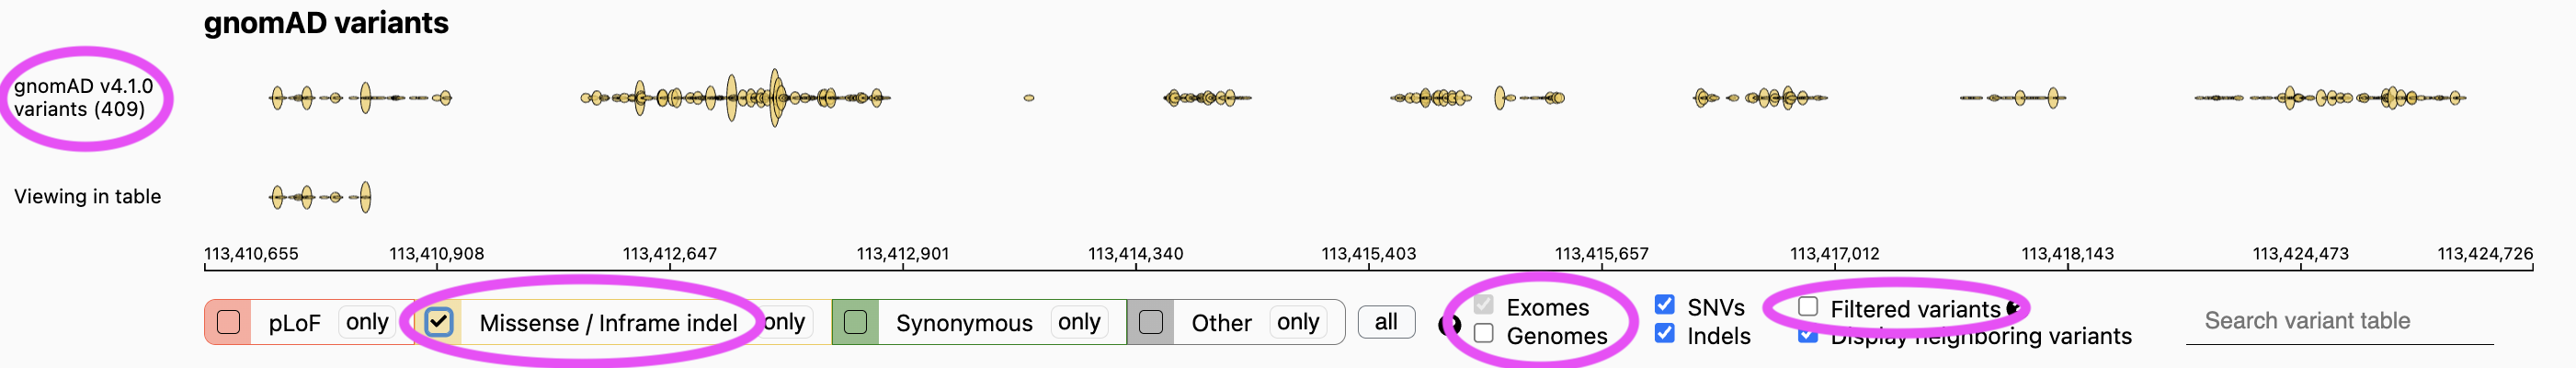

In [7]:
var_ht = filter_by_consequence_category(missense=True, ht=drd2_ht)
var_ht.show(5)
print("The total number of missense variants passing filters in DRD2 is: ", var_ht.count())

+-----------------+------------+
| locus           | alleles    |
+-----------------+------------+
| locus<GRCh38>   | array<str> |
+-----------------+------------+
| chr11:113410731 | ["C","A"]  |
| chr11:113410731 | ["C","T"]  |
| chr11:113410735 | ["G","A"]  |
| chr11:113410738 | ["G","T"]  |
| chr11:113410740 | ["A","G"]  |
+-----------------+------------+

+------------------------------------------------------------------------------+
| freq                                                                         |
+------------------------------------------------------------------------------+
| array<struct{AC: int32, AF: float64, AN: int32, homozygote_count: int64}>    |
+------------------------------------------------------------------------------+
| [(2,1.37e-06,1461866,0),(2,1.37e-06,1461894,0),(0,0.00e+00,33480,0),(2,4.... |
| [(1,6.84e-07,1461866,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
| [(75,5.13e-05,1461876,0),(75,5.13e-05,1461894,0),(0,0.00e+00,33480,0),(0,... |
| [(2,1.37e-06,1461886,0),(2,1.37e-06,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
| [(1,6.84e-07,1461884,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33480,0),(1,2.... |
+------------------------------------------------------------------------------+

+------------------+------------------+------------------+
| grpmax.gnomad.AC | grpmax.gnomad.AF | grpmax.gnomad.AN |
+------------------+------------------+------------------+
|            int32 |          float64 |            int32 |
+------------------+------------------+------------------+
|                2 |         4.47e-05 |            44724 |
|                1 |         8.99e-07 |          1112010 |
|                8 |         7.19e-06 |          1112004 |
|                2 |         5.04e-05 |            39700 |
|                1 |         2.24e-05 |            44724 |
+------------------+------------------+------------------+

+--------------------------------+-----------------------+-------------------+
| grpmax.gnomad.homozygote_count | grpmax.gnomad.gen_anc | grpmax.non_ukb.AC |
+--------------------------------+-----------------------+-------------------+
|                          int64 | str                   |             int32 |
+--------------------------------+-----------------------+-------------------+
|                              0 | "amr"                 |                 2 |
|                              0 | "nfe"                 |                NA |
|                              0 | "nfe"                 |                 2 |
|                              0 | "eas"                 |                 1 |
|                              0 | "amr"                 |                 1 |
+--------------------------------+-----------------------+-------------------+

+-------------------+-------------------+---------------------------------+
| grpmax.non_ukb.AF | grpmax.non_ukb.AN | grpmax.non_ukb.homozygote_count |
+-------------------+-------------------+---------------------------------+
|           float64 |             int32 |                           int64 |
+-------------------+-------------------+---------------------------------+
|          4.57e-05 |             43740 |                               0 |
|                NA |                NA |                              NA |
|          5.71e-06 |            350102 |                               0 |
|          2.77e-05 |             36070 |                               0 |
|          2.29e-05 |             43740 |                               0 |
+-------------------+-------------------+---------------------------------+

+------------------------+
| grpmax.non_ukb.gen_anc |
+------------------------+
| str                    |
+------------------------+
| "amr"                  |
| NA                     |
| "nfe"                  |
| "eas"                  |
| "amr"                  |
+------------------------+

+------------------------------------------------------------------------------+
| faf   

The total number of missense variants passing filters in DRD2 is:  409


### Filter to `synonymous` variants passing filters

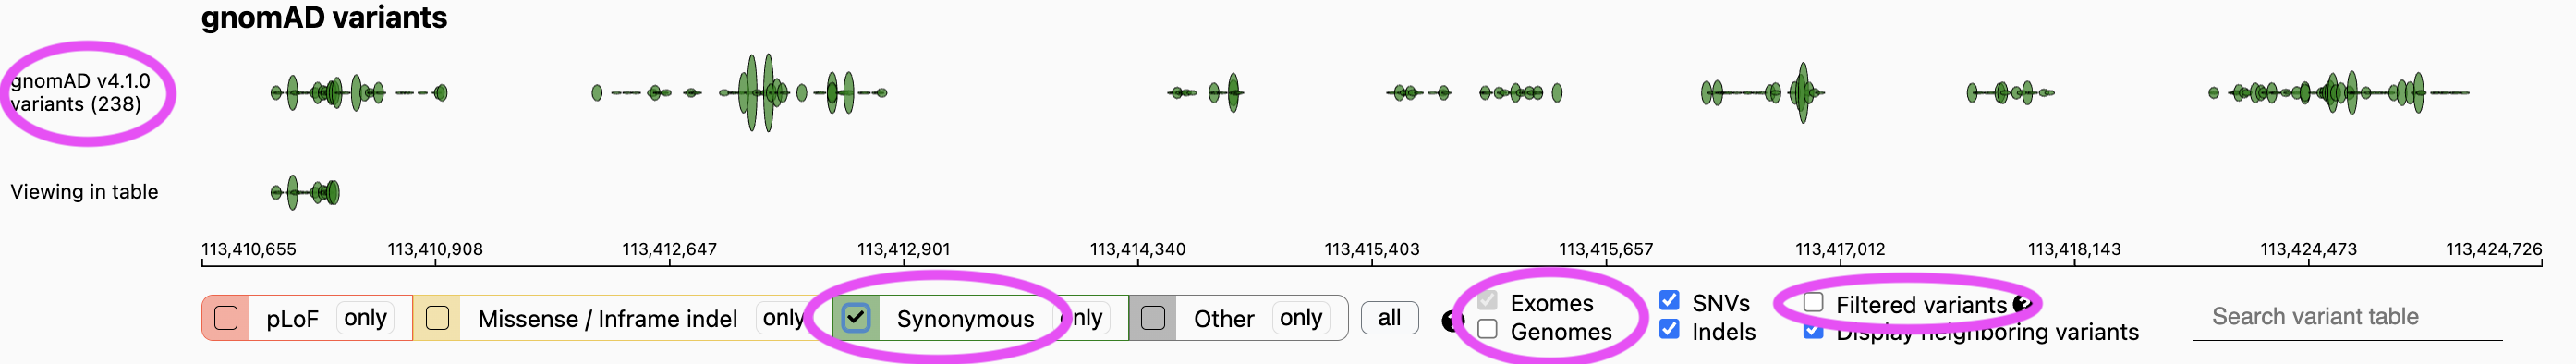

In [8]:
var_ht = filter_by_consequence_category(synonymous=True, ht=drd2_ht)
var_ht.show(5)
print("The total number of synonymous variants passing filters in DRD2 is: ", var_ht.count())

+-----------------+------------+
| locus           | alleles    |
+-----------------+------------+
| locus<GRCh38>   | array<str> |
+-----------------+------------+
| chr11:113410736 | ["G","A"]  |
| chr11:113410736 | ["G","T"]  |
| chr11:113410739 | ["G","A"]  |
| chr11:113410751 | ["G","A"]  |
| chr11:113410754 | ["C","T"]  |
+-----------------+------------+

+------------------------------------------------------------------------------+
| freq                                                                         |
+------------------------------------------------------------------------------+
| array<struct{AC: int32, AF: float64, AN: int32, homozygote_count: int64}>    |
+------------------------------------------------------------------------------+
| [(15,1.03e-05,1461882,0),(15,1.03e-05,1461894,0),(0,0.00e+00,33480,0),(0,... |
| [(1,6.84e-07,1461882,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
| [(1,6.84e-07,1461882,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33478,0),(0,0.... |
| [(1,6.84e-07,1461894,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
| [(576,3.94e-04,1461892,2),(576,3.94e-04,1461894,2),(12,3.58e-04,33480,1),... |
+------------------------------------------------------------------------------+

+------------------+------------------+------------------+
| grpmax.gnomad.AC | grpmax.gnomad.AF | grpmax.gnomad.AN |
+------------------+------------------+------------------+
|            int32 |          float64 |            int32 |
+------------------+------------------+------------------+
|               15 |         1.35e-05 |          1112010 |
|                1 |         8.99e-07 |          1112010 |
|               NA |               NA |               NA |
|                1 |         8.99e-07 |          1112012 |
|                8 |         1.39e-03 |             5768 |
+------------------+------------------+------------------+

+--------------------------------+-----------------------+-------------------+
| grpmax.gnomad.homozygote_count | grpmax.gnomad.gen_anc | grpmax.non_ukb.AC |
+--------------------------------+-----------------------+-------------------+
|                          int64 | str                   |             int32 |
+--------------------------------+-----------------------+-------------------+
|                              0 | "nfe"                 |                 1 |
|                              0 | "nfe"                 |                NA |
|                             NA | NA                    |                NA |
|                              0 | "nfe"                 |                 1 |
|                              0 | "mid"                 |                 4 |
+--------------------------------+-----------------------+-------------------+

+-------------------+-------------------+---------------------------------+
| grpmax.non_ukb.AF | grpmax.non_ukb.AN | grpmax.non_ukb.homozygote_count |
+-------------------+-------------------+---------------------------------+
|           float64 |             int32 |                           int64 |
+-------------------+-------------------+---------------------------------+
|          2.86e-06 |            350106 |                               0 |
|                NA |                NA |                              NA |
|                NA |                NA |                              NA |
|          2.86e-06 |            350108 |                               0 |
|          9.64e-04 |              4148 |                               0 |
+-------------------+-------------------+---------------------------------+

+------------------------+
| grpmax.non_ukb.gen_anc |
+------------------------+
| str                    |
+------------------------+
| "nfe"                  |
| NA                     |
| NA                     |
| "nfe"                  |
| "mid"                  |
+------------------------+

+------------------------------------------------------------------------------+
| faf   

The total number of synonymous variants passing filters in DRD2 is:  238


### Filter to 'Other' variants passing filters

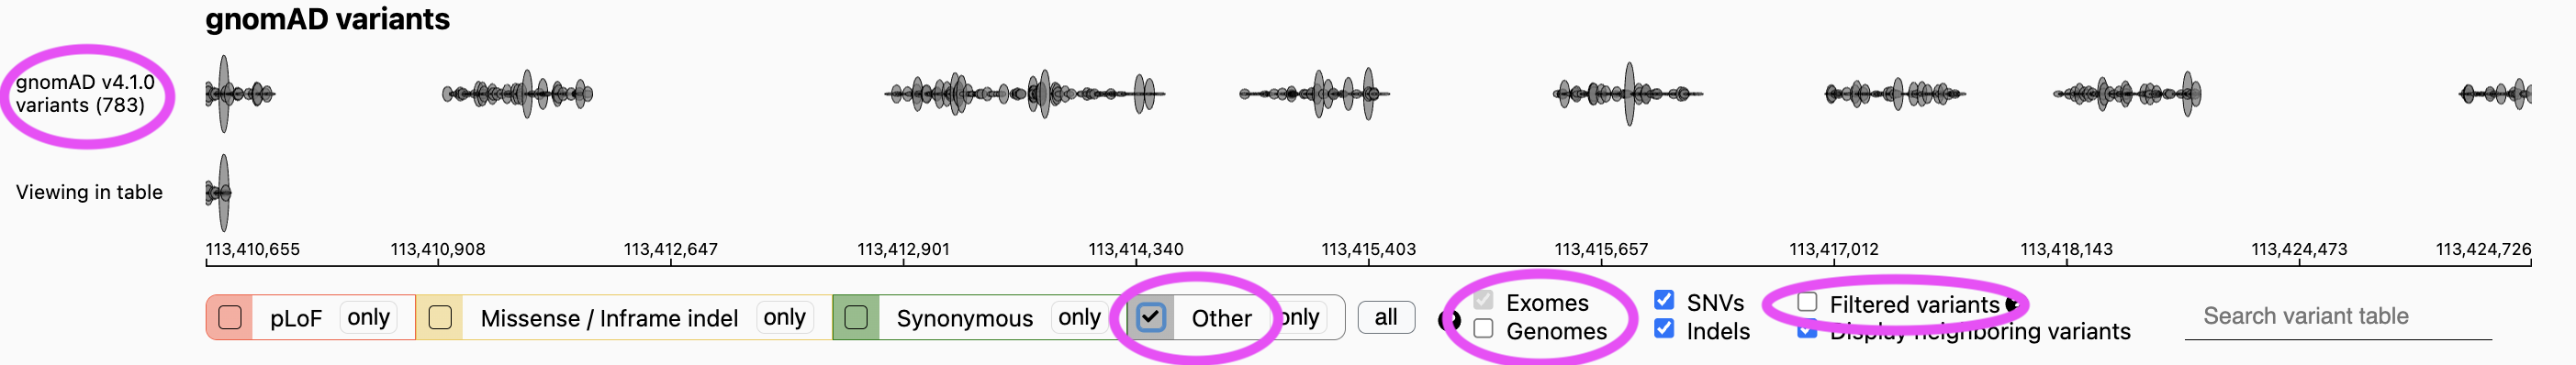

In [9]:
var_ht = filter_by_consequence_category(other=True, ht=drd2_ht)
var_ht.show(5)
print("The total number of other variants passing filters in DRD2 is: ", var_ht.count())

+-----------------+------------+
| locus           | alleles    |
+-----------------+------------+
| locus<GRCh38>   | array<str> |
+-----------------+------------+
| chr11:113410657 | ["C","T"]  |
| chr11:113410658 | ["G","A"]  |
| chr11:113410658 | ["G","T"]  |
| chr11:113410660 | ["A","G"]  |
| chr11:113410662 | ["G","A"]  |
+-----------------+------------+

+------------------------------------------------------------------------------+
| freq                                                                         |
+------------------------------------------------------------------------------+
| array<struct{AC: int32, AF: float64, AN: int32, homozygote_count: int64}>    |
+------------------------------------------------------------------------------+
| [(18,1.25e-05,1445518,0),(24,1.64e-05,1461322,0),(1,3.02e-05,33096,0),(0,... |
| [(23,1.59e-05,1448166,0),(23,1.57e-05,1461456,0),(0,0.00e+00,33180,0),(0,... |
| [(94,6.49e-05,1448162,0),(105,7.18e-05,1461456,0),(24,7.23e-04,33180,0),(... |
| [(1,6.89e-07,1450438,0),(2,1.37e-06,1461588,0),(0,0.00e+00,33208,0),(0,0.... |
| [(2,1.38e-06,1451396,0),(2,1.37e-06,1461538,0),(0,0.00e+00,33252,0),(1,2.... |
+------------------------------------------------------------------------------+

+------------------+------------------+------------------+
| grpmax.gnomad.AC | grpmax.gnomad.AF | grpmax.gnomad.AN |
+------------------+------------------+------------------+
|            int32 |          float64 |            int32 |
+------------------+------------------+------------------+
|                4 |         1.01e-04 |            39606 |
|                3 |         7.57e-05 |            39630 |
|               24 |         7.23e-04 |            33180 |
|                1 |         9.07e-07 |          1103066 |
|                1 |         2.24e-05 |            44696 |
+------------------+------------------+------------------+

+--------------------------------+-----------------------+-------------------+
| grpmax.gnomad.homozygote_count | grpmax.gnomad.gen_anc | grpmax.non_ukb.AC |
+--------------------------------+-----------------------+-------------------+
|                          int64 | str                   |             int32 |
+--------------------------------+-----------------------+-------------------+
|                              0 | "eas"                 |                 4 |
|                              0 | "eas"                 |                10 |
|                              0 | "afr"                 |                15 |
|                              0 | "nfe"                 |                 1 |
|                              0 | "amr"                 |                 1 |
+--------------------------------+-----------------------+-------------------+

+-------------------+-------------------+---------------------------------+
| grpmax.non_ukb.AF | grpmax.non_ukb.AN | grpmax.non_ukb.homozygote_count |
+-------------------+-------------------+---------------------------------+
|           float64 |             int32 |                           int64 |
+-------------------+-------------------+---------------------------------+
|          1.11e-04 |             36050 |                               0 |
|          2.86e-05 |            349848 |                               0 |
|          8.50e-04 |             17650 |                               0 |
|          2.86e-06 |            349920 |                               0 |
|          2.29e-05 |             43728 |                               0 |
+-------------------+-------------------+---------------------------------+

+------------------------+
| grpmax.non_ukb.gen_anc |
+------------------------+
| str                    |
+------------------------+
| "eas"                  |
| "nfe"                  |
| "afr"                  |
| "nfe"                  |
| "amr"                  |
+------------------------+

+------------------------------------------------------------------------------+
| faf   

The total number of other variants passing filters in DRD2 is:  783


## Get frequency information for specific genetic ancestry groups

The examples below show frequency filtering using the Table filtered to DRD2 `synonymous` variants.

In [10]:
drd2_synonymous_ht = filter_by_consequence_category(synonymous=True, ht=drd2_interval_ht)

### Single genetic ancestry group

In [11]:
var_ht = get_ancestry_callstats(gen_ancs='afr', ht=drd2_synonymous_ht)
var_ht.show(5)

+-----------------+------------+----------+--------+----------+--------+
| locus           | alleles    | filters  | afr.AC |   afr.AF | afr.AN |
+-----------------+------------+----------+--------+----------+--------+
| locus<GRCh38>   | array<str> | set<str> |  int32 |  float64 |  int32 |
+-----------------+------------+----------+--------+----------+--------+
| chr11:113410736 | ["G","A"]  | {}       |      0 | 0.00e+00 |  33480 |
| chr11:113410736 | ["G","T"]  | {}       |      0 | 0.00e+00 |  33480 |
| chr11:113410739 | ["G","A"]  | {}       |      0 | 0.00e+00 |  33478 |
| chr11:113410751 | ["G","A"]  | {}       |      0 | 0.00e+00 |  33480 |
| chr11:113410754 | ["C","T"]  | {}       |     12 | 3.58e-04 |  33480 |
+-----------------+------------+----------+--------+----------+--------+

+----------------------+
| afr.homozygote_count |
+----------------------+
|                int64 |
+----------------------+
|                    0 |
|                    0 |
|                    0 |
|                    0 |
|                    1 |
+----------------------+
showing top 5 rows

### Multiple genetic ancestry groups

In [12]:
var_ht = get_ancestry_callstats(gen_ancs=['afr', 'amr', 'eas', 'mid', 'nfe', 'sas'], ht=drd2_synonymous_ht)
var_ht.show()

+-----------------+------------+----------+--------+----------+--------+
| locus           | alleles    | filters  | afr.AC |   afr.AF | afr.AN |
+-----------------+------------+----------+--------+----------+--------+
| locus<GRCh38>   | array<str> | set<str> |  int32 |  float64 |  int32 |
+-----------------+------------+----------+--------+----------+--------+
| chr11:113410736 | ["G","A"]  | {}       |      0 | 0.00e+00 |  33480 |
| chr11:113410736 | ["G","T"]  | {}       |      0 | 0.00e+00 |  33480 |
| chr11:113410739 | ["G","A"]  | {}       |      0 | 0.00e+00 |  33478 |
| chr11:113410751 | ["G","A"]  | {}       |      0 | 0.00e+00 |  33480 |
| chr11:113410754 | ["C","T"]  | {}       |     12 | 3.58e-04 |  33480 |
| chr11:113410757 | ["G","A"]  | {}       |      0 | 0.00e+00 |  33480 |
| chr11:113410757 | ["G","T"]  | {}       |      0 | 0.00e+00 |  33480 |
| chr11:113410763 | ["C","T"]  | {}       |      0 | 0.00e+00 |  33480 |
| chr11:113410769 | ["G","A"]  | {}       |      0 | 0.00e+00 |  33480 |
| chr11:113410775 | ["G","A"]  | {}       |      0 | 0.00e+00 |  33480 |
+-----------------+------------+----------+--------+----------+--------+

+----------------------+--------+----------+--------+----------------------+
| afr.homozygote_count | amr.AC |   amr.AF | amr.AN | amr.homozygote_count |
+----------------------+--------+----------+--------+----------------------+
|                int64 |  int32 |  float64 |  int32 |                int64 |
+----------------------+--------+----------+--------+----------------------+
|                    0 |      0 | 0.00e+00 |  44724 |                    0 |
|                    0 |      0 | 0.00e+00 |  44724 |                    0 |
|                    0 |      0 | 0.00e+00 |  44724 |                    0 |
|                    0 |      0 | 0.00e+00 |  44724 |                    0 |
|                    1 |     43 | 9.61e-04 |  44724 |                    0 |
|                    0 |      0 | 0.00e+00 |  44724 |                    0 |
|                    0 |      0 | 0.00e+00 |  44724 |                    0 |
|                    0 |      0 | 0.00e+00 |  44724 |                    0 |
|                    0 |      0 | 0.00e+00 |  44724 |                    0 |
|                    0 |      0 | 0.00e+00 |  44724 |                    0 |
+----------------------+--------+----------+--------+----------------------+

+--------+----------+--------+----------------------+--------+----------+
| eas.AC |   eas.AF | eas.AN | eas.homozygote_count | mid.AC |   mid.AF |
+--------+----------+--------+----------------------+--------+----------+
|  int32 |  float64 |  int32 |                int64 |  int32 |  float64 |
+--------+----------+--------+----------------------+--------+----------+
|      0 | 0.00e+00 |  39700 |                    0 |      0 | 0.00e+00 |
|      0 | 0.00e+00 |  39700 |                    0 |      0 | 0.00e+00 |
|      0 | 0.00e+00 |  39700 |                    0 |      0 | 0.00e+00 |
|      0 | 0.00e+00 |  39700 |                    0 |      0 | 0.00e+00 |
|      0 | 0.00e+00 |  39700 |                    0 |      8 | 1.39e-03 |
|      1 | 2.52e-05 |  39700 |                    0 |      0 | 0.00e+00 |
|      0 | 0.00e+00 |  39700 |                    0 |      0 | 0.00e+00 |
|      0 | 0.00e+00 |  39700 |                    0 |      0 | 0.00e+00 |
|      0 | 0.00e+00 |  39700 |                    0 |      0 | 0.00e+00 |
|      1 | 2.52e-05 |  39700 |                    0 |      0 | 0.00e+00 |
+--------+----------+--------+----------------------+--------+----------+

+--------+----------------------+--------+----------+---------+
| mid.AN | mid.homozygote_count | nfe.AC |   nfe.AF |  nfe.AN |
+--------+----------------------+--------+----------+---------+
|  int32 |                int64 |  int32 |  float64 |   int32 |
+--------+----------------------+--------+----------+---------+
|   5762 |                    0 |     15 | 1.35e-05 | 1112010 |
|   5762 |                   

## Get frequency information for a specific genetic ancestry group at a specific variant

### Example when the variant exists

In [13]:
var_ht = get_single_variant_ancestry_callstats(gen_ancs='AFR', contig='chr22', position=15528692, ref='C', alt='G')
var_ht.show(5)

+----------------+------------+----------+--------+----------+--------+
| locus          | alleles    | filters  | afr.AC |   afr.AF | afr.AN |
+----------------+------------+----------+--------+----------+--------+
| locus<GRCh38>  | array<str> | set<str> |  int32 |  float64 |  int32 |
+----------------+------------+----------+--------+----------+--------+
| chr22:15528692 | ["C","G"]  | {}       |    635 | 1.90e-02 |  33380 |
+----------------+------------+----------+--------+----------+--------+

+----------------------+
| afr.homozygote_count |
+----------------------+
|                int64 |
+----------------------+
|                    6 |
+----------------------+

### Example when the variant *doesn't* exist

In [14]:
var_ht = get_single_variant_ancestry_callstats(gen_ancs='AFR', contig='chr22', position=15528692, ref='C', alt='A')
var_ht.show(5)

+---------------+------------+----------+--------+---------+--------+
| locus         | alleles    | filters  | afr.AC |  afr.AF | afr.AN |
+---------------+------------+----------+--------+---------+--------+
| locus<GRCh38> | array<str> | set<str> |  int32 | float64 |  int32 |
+---------------+------------+----------+--------+---------+--------+
+---------------+------------+----------+--------+---------+--------+

+----------------------+
| afr.homozygote_count |
+----------------------+
|                int64 |
+----------------------+
+----------------------+